# Store Sales Insights Report 📈🛒📊

<a id="toc"></a>

# 🗺️ Table of Content
* [1. Import Libraries](#1.0)
* [2. Loading Data](#2.0)
* [3. Exploratory Data Analysis (EDA)](#3.0)
    * [3.1 Sales by Store](#3.1)
    * [3.2 Top 10 Stores](#3.2)
    * [3.3 Bottom 10 Stores](#3.3)
    * [3.4 Analysis of the Top 5 Performing Stores](#3.4)
        * [3.4.1 Top 5 Items](#3.4.1)
        * [3.4.2 Bottom 5 Items](#3.4.2)
        * [3.4.3 Monthly Sales](#3.4.3)        
    * [3.5 Analysis of the 5 Lowest-Performing Stores](#3.5)
        * [3.5.1 Top 5 Items](#3.5.1)
        * [3.5.2 Bottom 5 Items](#3.5.2)
        * [3.5.3 Monthly Sales](#3.5.3) 
* [4. KPI](#4.0)
    * [4.1 Data-Driven Recommendations](#4.1)



<a id="1"></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
# Set numpy random seed
np.random.seed(1)

# Data visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# Palettes
# Orange range palette
orange_colors = ["#FFE5CC", "#FFD1A8", "#FFBD85", "#FFA862", "#FF9440", "#FF8020", "#FF6B00", "#E66000", "#CC5600", "#B34B00"]
# Red range palette
red_colors = ["#FFE5E5", "#FFCCCC", "#FFB2B2", "#FF9999", "#FF8080", "#FF6666", "#FF4D4D", "#FF3333", "#FF1A1A", "#FF0000"]
# Blue range palette
blue_colors = ["#AEC6CF", "#B2D8E8", "#B3D9E8", "#A7C7E7", "#B7E1E8", "#BAD1E8", "#A3D1E8", "#B4CDED", "#C4E1F2"]
# Green range palette
green_colors = [ "#CCFFCC", "#B2FFB2", "#99FF99", "#80FF80", "#66FF66", "#4DFF4D", "#33FF33", "#1AFF1A", "#00E600", "#00CC00"]
# Green 32 range palette
green_32_colors = [
    "#E6FFE6", "#D9FFD9", "#CCFFCC", "#BFFFBA", "#B2FFB2", "#A5FFA5", "#99FF99", "#8CFF8C",
    "#80FF80", "#73FF73", "#66FF66", "#59FF59", "#4DFF4D", "#40FF40", "#33FF33", "#26FF26",
    "#1AFF1A", "#0DFF0D", "#00FF00", "#00F200", "#00E600", "#00D900", "#00CC00", "#00BF00",
    "#00B200", "#00A500", "#009900", "#008C00", "#008000", "#007300", "#006600", "#005900"
]

<a id="2"></a>

# 💾 Loading Data

In [2]:
# Loading csv data
sales = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv")
# Parse date field 
sales["date"] = pd.to_datetime(sales["date"], format='%d.%m.%Y')

print("Dataset length: ", sales.shape[0])
sales.head()

Dataset length:  2935849


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


<p style="font-size:16px">Check NaN values in each column</p> 

In [3]:
sales.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

<a id="3.1"></a>

# 🔍 Exploratory Data Analysis (EDA)

<a id="3.1"></a>

## 📊 Sales by Store

<p style="font-size: 16px"> The total sales for each store is calculated as ( item_price * item_cnt_day ) </p>

In [4]:
def total_sales(df):
    """
        Return the total sales
        Input:
            df (DataFrame): DataFrame with columns: "item_price" and "item_cnt_day"
            where the values are the sum of each item in a time range. 
    """
    df["total_sales"] = df["item_price"] * df["item_cnt_day"] 
    return df

In [5]:
# Sort sales data by store
sales_sorted = sales.sort_values(["shop_id"], ascending=[True])
# Group data by shop and item and sum item_price and item_cnt_day along all days
sum_sales = sales_sorted.groupby(["shop_id"])[["item_price", "item_cnt_day"]].sum()
# Compute the total sales by items
total_item_sales_by_store = total_sales(sum_sales)

total_item_sales_by_store.reset_index(drop=False, inplace=True)
total_item_sales_by_store

,shop_id,item_price,item_cnt_day,total_sales
0,0,5.553869e+06,11705.0,6.500804e+10
1,1,2.926161e+06,6311.0,1.846700e+10
2,2,3.510444e+07,30620.0,1.074898e+12
3,3,2.647262e+07,28355.0,7.506310e+11
4,4,3.533539e+07,43942.0,1.552708e+12
5,5,3.326088e+07,42762.0,1.422302e+12
6,6,7.455831e+07,100489.0,7.492290e+12
7,7,5.607710e+07,67058.0,3.760418e+12
8,8,2.226273e+06,3595.0,8.003450e+09
9,9,4.714303e+06,15866.0,7.479713e+10


In [6]:
# Statistical data of total sales
total_item_sales_by_store["total_sales"].describe()

count    6.000000e+01
mean     4.674502e+12
std      9.048200e+12
min      1.177503e+08
25%      3.807710e+11
50%      1.880562e+12
75%      3.966141e+12
max      5.306935e+13
Name: total_sales, dtype: float64

The median is a better measure of central tendency for total sales data due to the presence of high and low peaks.

In [7]:
print(f"Median of total sales: {total_item_sales_by_store['total_sales'].median()}")

Median of total sales: 1880561607814.838


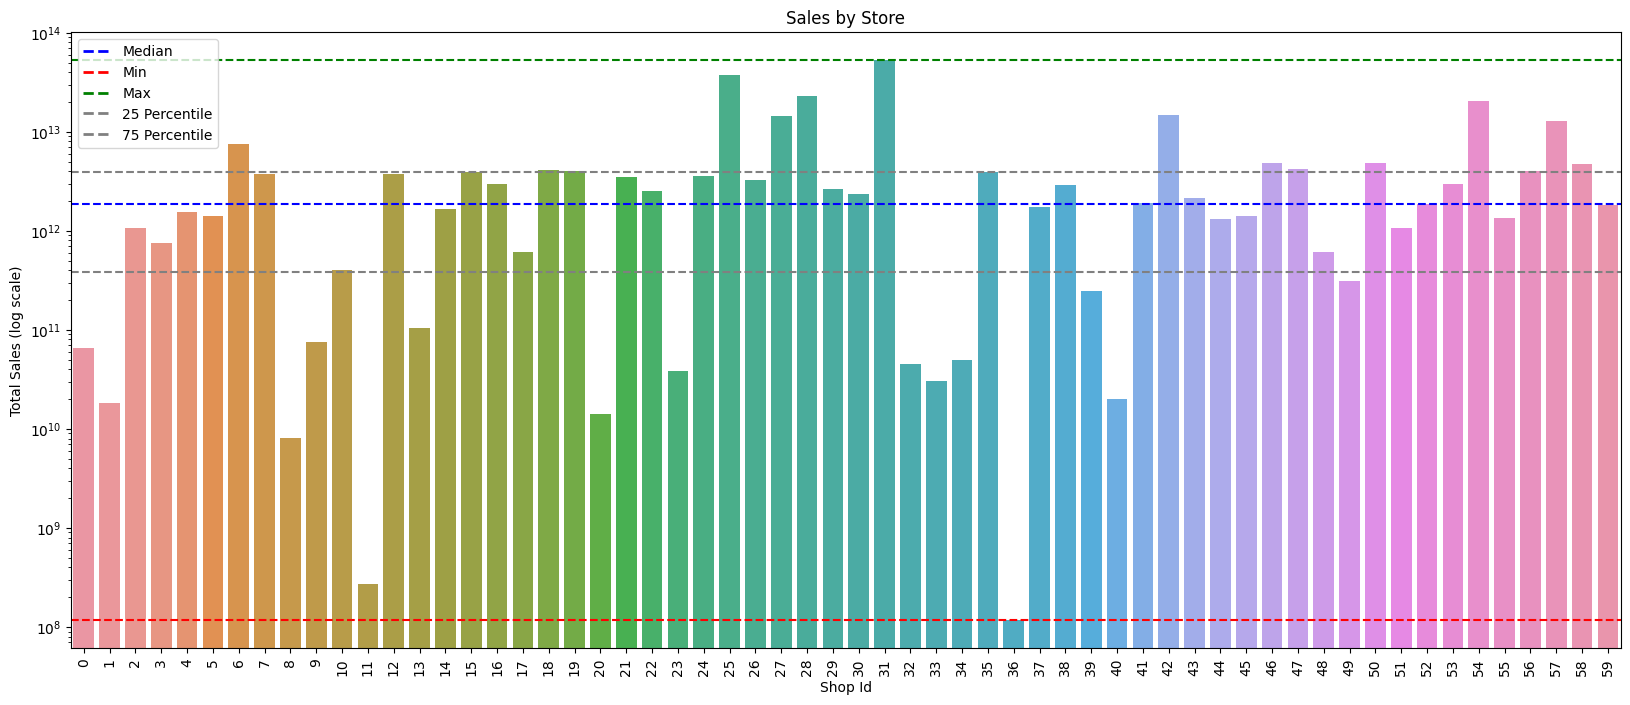

In [8]:
fig, ax = plt.subplots(figsize=(20,8))
# Barplot of total sales
sns.barplot(data=total_item_sales_by_store, x="shop_id", y="total_sales", errorbar=None, ax=ax)
plt.xticks(rotation=90)
# Statistical measures
ax.axhline(1880561607814.838, color='blue', linestyle='--', label="Median")
ax.axhline(1.177503e+08, color='red', linestyle='--', label="Min")
ax.axhline(5.306935e+13, color='green', linestyle='--', label="Max")
ax.axhline(3.807710e+11, color='gray', linestyle='--', label="25 Percentile")
ax.axhline(3.966141e+12, color='gray', linestyle='--', label="75 Percentile")
plt.title("Sales by Store")
plt.ylabel("Total Sales (log scale)")
plt.xlabel("Shop Id")
# Create legend of statistical measures
stat = [
    Line2D([0], [0], color='blue', lw=2, linestyle='--'),
    Line2D([0], [0], color='red', lw=2, linestyle='--'),
    Line2D([0], [0], color='green', lw=2, linestyle='--'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--')
]
ax.legend(stat, ["Median", "Min", "Max", "25 Percentile", "75 Percentile"])
ax.set_yscale('log')
plt.show()

<p style="font-size:16px">
    📍 Considering the statistical measures, many stores have high or acceptable profitable sales. However, there are a couple of stores with low profit, and a few others fall below the 25th percentile in sales compared to other stores. In the next sections, the highest and lowest performing stores will be analyze.   
</p>

<a id="3.2"></a>

## Top 10 Stores

In [9]:
# Sort sales and get the top 50
sorted_total_item_sales = total_item_sales_by_store.sort_values("total_sales", ascending=False).head(50)
# Drop duplicates shop id and get the top 10 stores
sorted_total_item_sales = sorted_total_item_sales.drop_duplicates("shop_id").head(10)
# Reset index
sorted_total_item_sales.reset_index(drop=True, inplace=True)
sorted_total_item_sales

,shop_id,item_price,item_cnt_day,total_sales
0,31,1.707634e+08,310777.0,5.306935e+13
1,25,1.555576e+08,241920.0,3.763248e+13
2,28,1.252947e+08,184557.0,2.312401e+13
3,54,1.096694e+08,185790.0,2.037548e+13
4,42,1.015515e+08,144934.0,1.471826e+13
5,27,1.056489e+08,136657.0,1.443766e+13
6,57,9.131521e+07,141107.0,1.288522e+13
7,6,7.455831e+07,100489.0,7.492290e+12
8,50,6.335695e+07,76238.0,4.830207e+12
9,46,6.093469e+07,78990.0,4.813231e+12


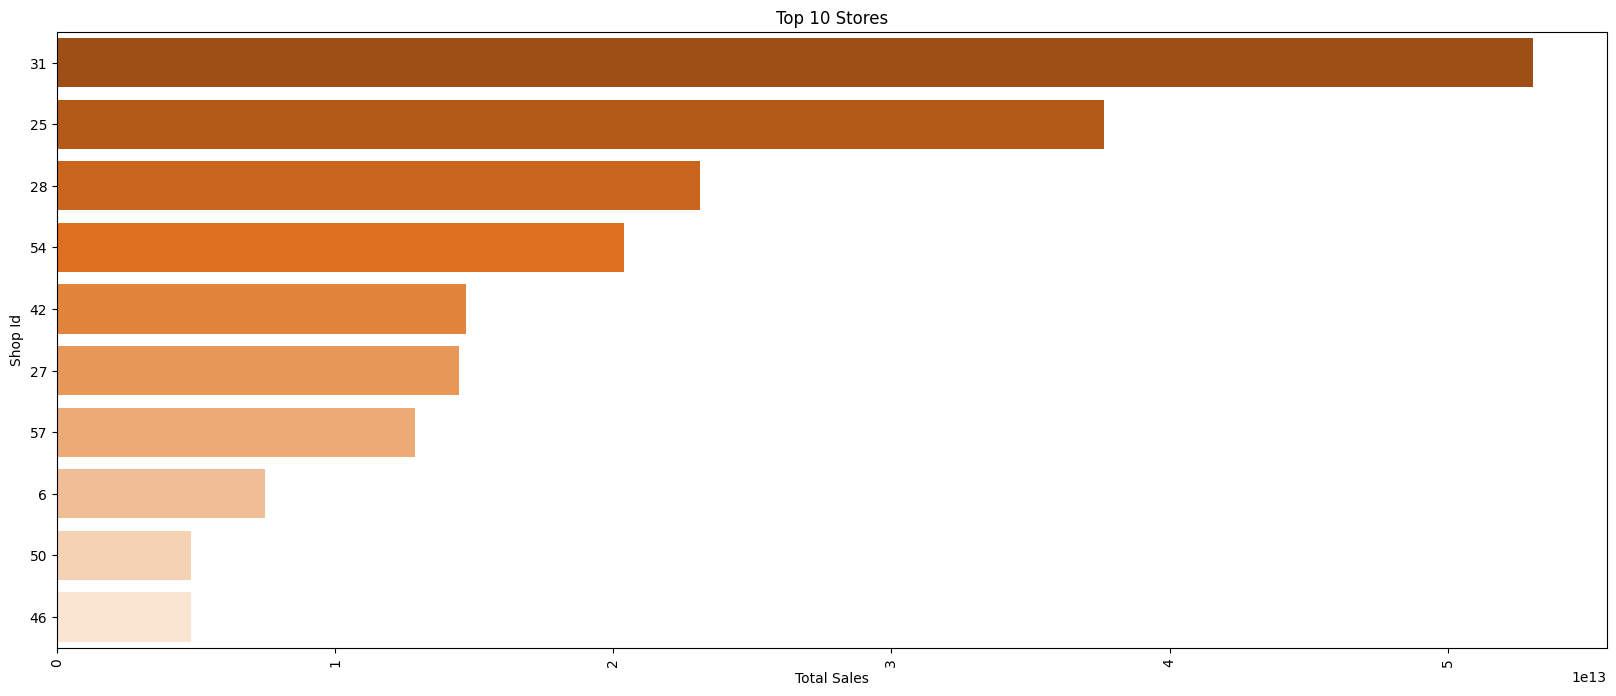

In [10]:
# Dark color first
orange_colors.reverse()

fig = plt.subplots(figsize=(20,8))
sns.barplot(data=sorted_total_item_sales, y="shop_id", x="total_sales", errorbar=None, orient="h",
            order=sorted_total_item_sales["shop_id"], palette=orange_colors)
plt.xticks(rotation=90)
plt.title("Top 10 Stores")
plt.xlabel("Total Sales")
plt.ylabel("Shop Id")
plt.show()

<p style="font-size:16px">
    📍 The plot above shows that two out of the ten stores lead in sales, with a significant difference compared to the others.
</p>

<a id="3.3"></a>

## Bottom 10 Stores

In [11]:
# Sort sales and get the top 50
sorted_total_item_sales_b = total_item_sales_by_store.sort_values("total_sales", ascending=True).head(50)
# Drop duplicates shop id
sorted_total_item_sales_b = sorted_total_item_sales_b.drop_duplicates("shop_id").head(10)
# Reset index
sorted_total_item_sales_b.reset_index(drop=True, inplace=True)
sorted_total_item_sales_b

,shop_id,item_price,item_cnt_day,total_sales
0,36,3.568190e+05,330.0,1.177503e+08
1,11,4.798425e+05,572.0,2.744699e+08
2,8,2.226273e+06,3595.0,8.003450e+09
3,20,2.389266e+06,5872.0,1.402977e+10
4,1,2.926161e+06,6311.0,1.846700e+10
5,40,4.080156e+06,4943.0,2.016821e+10
6,33,5.594080e+06,5482.0,3.066674e+10
7,23,5.023142e+06,7705.0,3.870331e+10
8,32,5.098652e+06,8781.0,4.477126e+10
9,34,7.695497e+06,6451.0,4.964365e+10


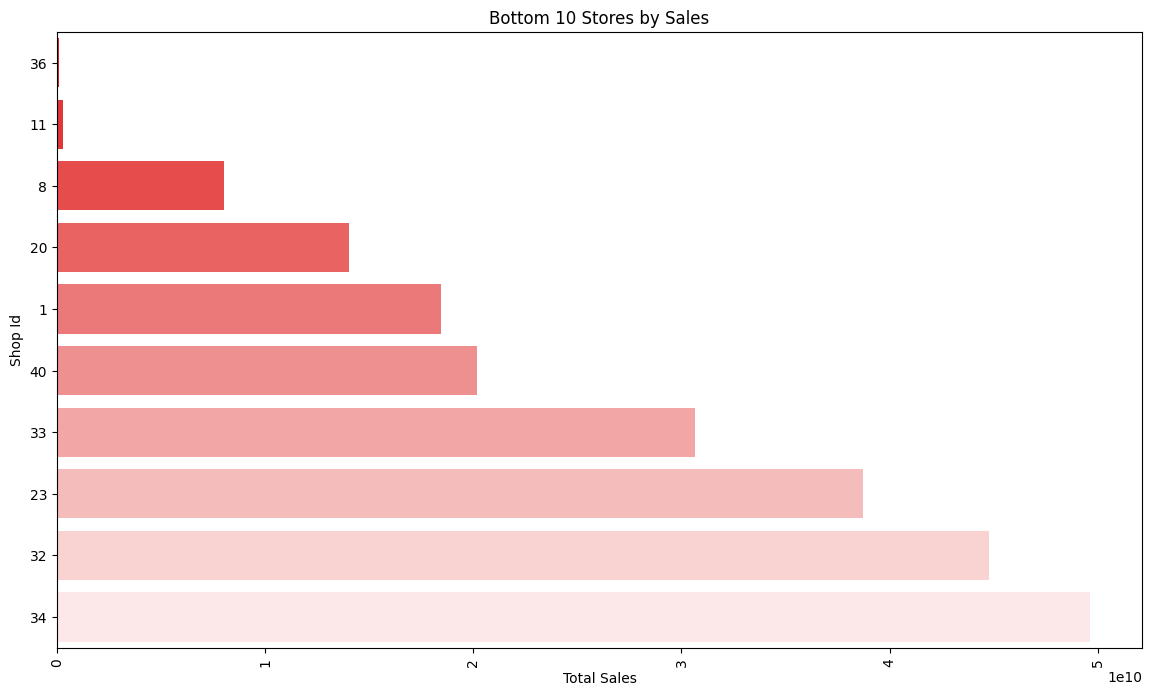

In [12]:
# Dark color first
red_colors.reverse()

fig = plt.subplots(figsize=(14,8))
sns.barplot(data=sorted_total_item_sales_b, y="shop_id", x="total_sales", errorbar=None, orient="h",
            order=sorted_total_item_sales_b["shop_id"], palette=red_colors)
plt.xticks(rotation=90)
plt.title("Bottom 10 Stores by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Shop Id")
plt.show()

<p style="font-size:16px">
    📍 The plot above shows that two out of the ten stores have poor sales performance, and none of the ten stores reach the 25th percentile.
</p>

<p style="font-size:16px">
    📍 In the next section, the top and bottom 5 stores will be analyzed to extract insights into the strengths and deficiencies of each.
</p>

<a id="3.4"></a>

## 📶 Analysis of the Top 5 Performing Stores

Aspects to consider:

1. Top 5 Items.
2. Bottom 5 Items.
3. Monthly Sales.

<a id="3.4.1"></a>

### Top 5 Items

In [13]:
sales_sorted = sales.sort_values(["shop_id", "item_id"], ascending=[True, True])
# Group data by shop and item and sum item_price and item_cnt_day along all days
sum_sales = sales_sorted.groupby(["shop_id", "item_id"])[["item_price", "item_cnt_day"]].sum().reset_index()
# Compute the total sales by items
total_item_sales_by_store = total_sales(sum_sales)
# Filter the top 5 performing stores
total_item_sales_by_store = total_item_sales_by_store[total_item_sales_by_store["shop_id"].isin([31, 25, 28, 54, 42])]

In [14]:
group_by_store = total_item_sales_by_store.groupby(['shop_id', "item_id"]).agg({
    "total_sales": 'sum'
})
group_by_store = group_by_store.sort_values(["shop_id", "total_sales"], ascending=[True, False])
# Extract the top 5 profitable items
top_5_items = group_by_store.groupby("shop_id").head(5)
top_5_items.reset_index(drop=False, inplace=True)
top_5_items

,shop_id,item_id,total_sales
0,25,6675,2.523688e+09
1,25,3732,6.160203e+08
2,25,16787,3.553636e+08
3,25,3734,3.535389e+08
4,25,2808,3.534601e+08
5,28,6675,1.535193e+09
6,28,3732,5.679423e+08
7,28,16787,2.937279e+08
8,28,3734,2.846045e+08
9,28,5822,2.235204e+08


<p style="font-size:16px"><b>
    ❓How many of these items are repeated across the top 5 stores?
   </b></p>

In [15]:
items_repeated = top_5_items["item_id"].duplicated(keep=False).sum()
print(f"There are {items_repeated} of {len(top_5_items)} items that are repeated")
items_repeated = top_5_items[top_5_items["item_id"].duplicated(keep=False)]
items_repeated

There are 24 of 25 items that are repeated


,shop_id,item_id,total_sales
0,25,6675,2.523688e+09
1,25,3732,6.160203e+08
2,25,16787,3.553636e+08
3,25,3734,3.535389e+08
5,28,6675,1.535193e+09
6,28,3732,5.679423e+08
7,28,16787,2.937279e+08
8,28,3734,2.846045e+08
9,28,5822,2.235204e+08
10,31,6675,2.551588e+09


In [16]:
# Sort items by total_sales
sorted_items = (
    items_repeated.groupby("shop_id")
    .apply(lambda x: x.sort_values("total_sales", ascending=False))
    .reset_index(drop=True)
)

/tmp/ipykernel_2246/1866744267.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("total_sales", ascending=False))


In [17]:
green_colors.reverse()

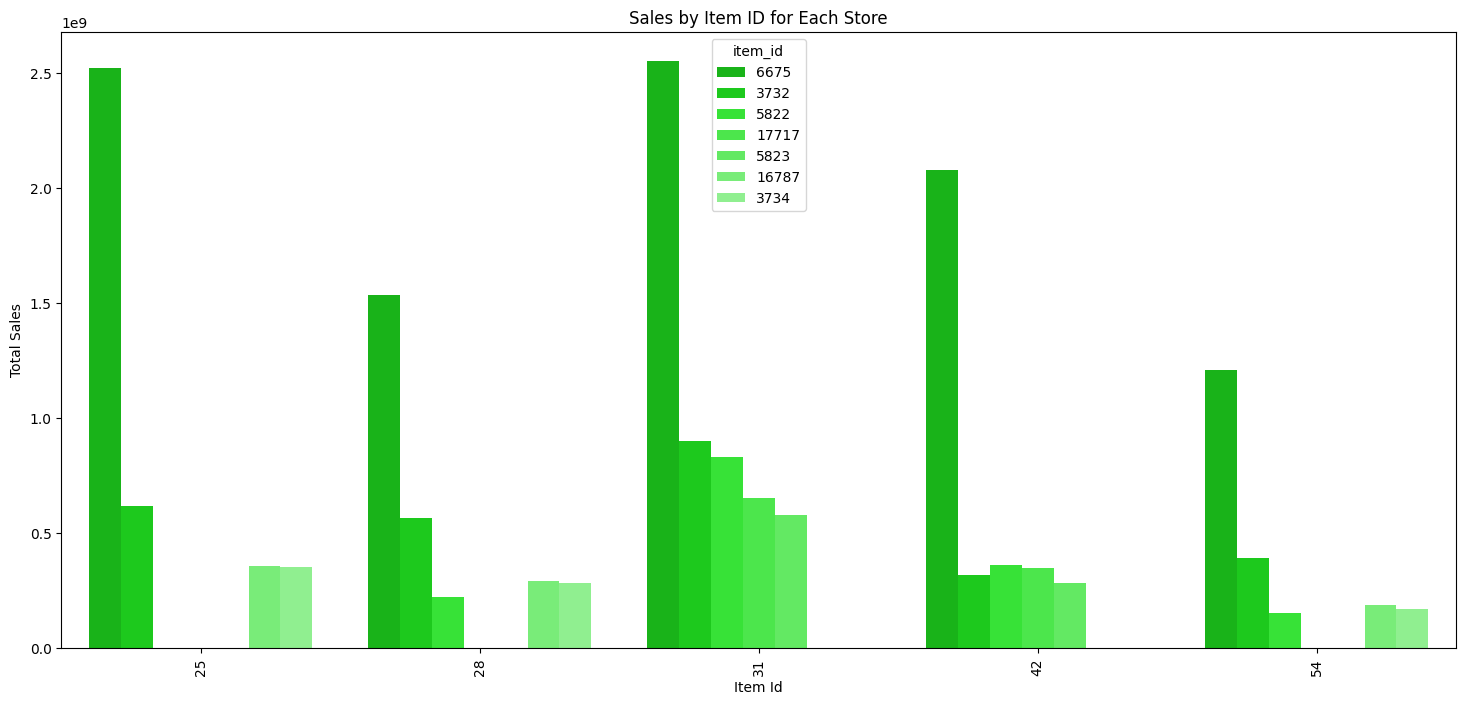

In [18]:
# Unique item id
item_ids = sorted_items["item_id"].unique()

fig, ax = plt.subplots(figsize=(18,8))
sns.barplot(data=sorted_items, x="shop_id", y="total_sales", hue="item_id", errorbar=None, palette=green_colors,
           hue_order=sorted(item_ids, key=lambda x: sorted_items[sorted_items["item_id"] == x]["total_sales"].sum(), reverse=True),)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Sales by Item ID for Each Store")

plt.ylabel("Total Sales")
plt.xlabel("Item Id")
plt.show()

<p style="font-size:16px">
    📍 The graph above shows that the 5 most profitable stores predominantly sell the item with ID 6675. The remaining items vary in sales across different stores.
</p>

In [19]:
# Group by item id and sort by total sales
total_sales_by_item = sorted_items.groupby("item_id")["total_sales"].sum().sort_values(ascending=False)
# Mapping each item id with a color green
color_palette = sns.color_palette(green_colors, n_colors=len(total_sales_by_item.index))
color_mapping = dict(zip(total_sales_by_item.index, color_palette))

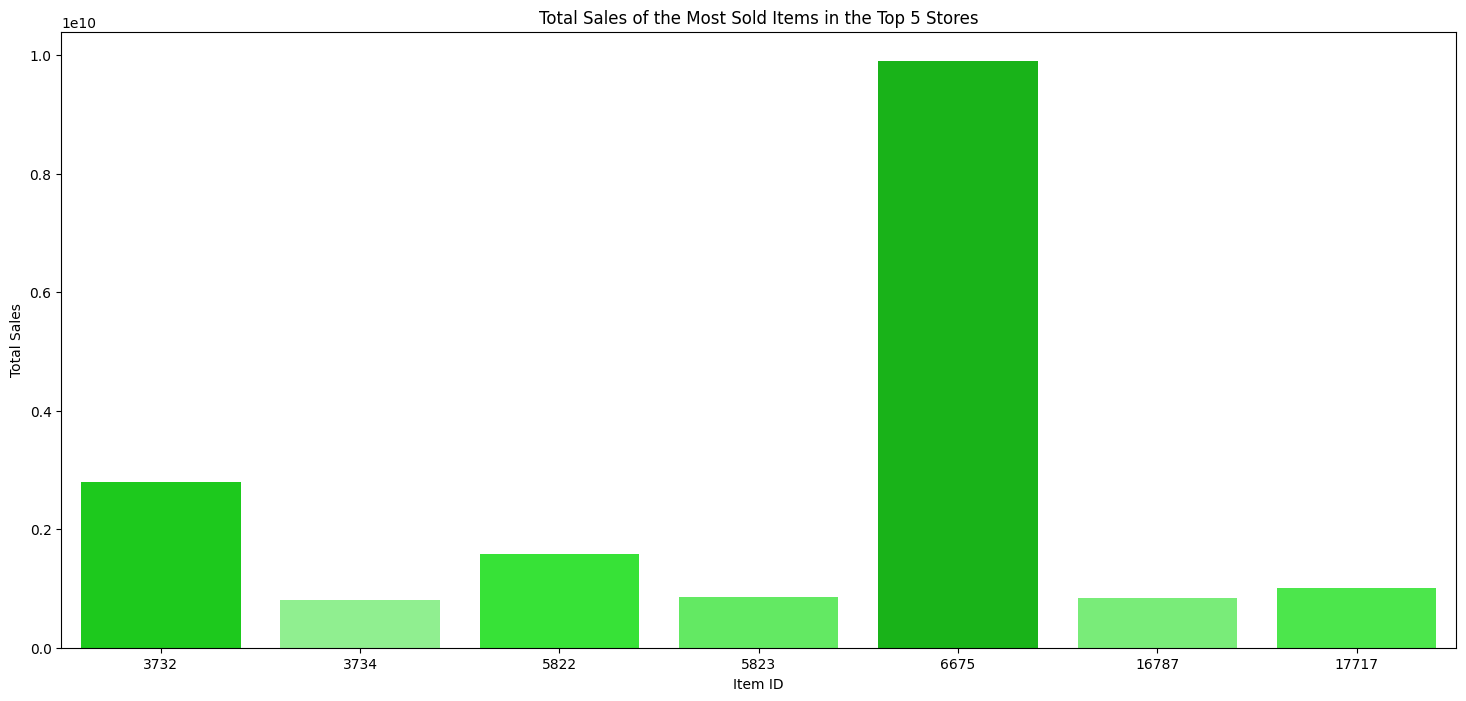

In [20]:
fig = plt.subplots(figsize=(18,8))

sns.barplot(data=total_sales_by_item.reset_index(drop=False),
           x="item_id", y="total_sales", palette=color_mapping)

plt.title("Total Sales of the Most Sold Items in the Top 5 Stores")
plt.xlabel("Item ID")
plt.ylabel("Total Sales")
plt.show()

<p style="font-size:16px">
    📍 The most profitable item is 6675, showing a significant difference compared to the others. The next two most profitable items are 3732 and 5822. The remaining items perform similarly.
</p>

<a id="3.4.2"></a>

### Bottom 5 Items

In [21]:
group_by_store = total_item_sales_by_store.groupby(['shop_id', "item_id"]).agg({
    "total_sales": 'sum'
})
group_by_store = group_by_store.sort_values(["shop_id", "total_sales"], ascending=[True, True])
bottom_5_items = group_by_store.groupby("shop_id").head(5)
bottom_5_items.reset_index(drop=False, inplace=True)
bottom_5_items

,shop_id,item_id,total_sales
0,25,2552,0.0
1,25,3584,0.0
2,25,5481,0.0
3,25,10520,0.0
4,25,14490,0.0
5,28,8775,-349.0
6,28,2340,0.0
7,28,5471,0.0
8,28,20139,0.4
9,28,11856,0.9


<p style="font-size:16px"><b>
    ❓How many of these items are repeated across the top 5 stores?
   </b></p>

In [22]:
items_repeated = bottom_5_items["item_id"].duplicated(keep=False).sum()
print(f"There are {items_repeated} of {len(bottom_5_items)} items that are repeated")
items_repeated = bottom_5_items[bottom_5_items["item_id"].duplicated(keep=False)]
items_repeated

There are 0 of 25 items that are repeated


,shop_id,item_id,total_sales


<p style="font-size:16px">
    📍 In the top 5 stores, there are three items with negative total sales performance: 8775, 13474, and 8585. The rest of the items do not contribute to increasing sales, but they do not decrease it either.
</p>

<a id="3.4.3"></a>

### Monthly Sales

In [23]:
sale_by_months = total_sales(sales)
# Filter interest field
sale_by_months = sale_by_months[["date", "shop_id", "item_id", "total_sales"]]
# Filter by the top 5 stores
sale_by_months_5_shops = sale_by_months[sale_by_months["shop_id"].isin([31, 25, 28, 54, 42])]
# Create a month column
sale_by_months_5_shops["month"] = sale_by_months_5_shops["date"].dt.month
# Create a year column
sale_by_months_5_shops["year"] = sale_by_months_5_shops["date"].dt.year 
sale_by_months_5_shops

/tmp/ipykernel_2246/3426234873.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_by_months_5_shops["month"] = sale_by_months_5_shops["date"].dt.month
/tmp/ipykernel_2246/3426234873.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_by_months_5_shops["year"] = sale_by_months_5_shops["date"].dt.year


,date,shop_id,item_id,total_sales,month,year
1,2013-01-03,25,2552,899.00,1,2013
2,2013-01-05,25,2552,-899.00,1,2013
3,2013-01-06,25,2554,1709.05,1,2013
4,2013-01-15,25,2555,1099.00,1,2013
5,2013-01-10,25,2564,349.00,1,2013
...,...,...,...,...,...,...
2935844,2015-10-10,25,7409,299.00,10,2015
2935845,2015-10-09,25,7460,299.00,10,2015
2935846,2015-10-14,25,7459,349.00,10,2015
2935847,2015-10-22,25,7440,299.00,10,2015


<p style="font-size:16px">Compute the Sum of Total Sales by Month</p>

In [24]:
item_count = sale_by_months_5_shops.groupby(["shop_id", "year", "month"]).agg({
    "total_sales": "sum"
}).reset_index(drop=False)
item_count

,shop_id,year,month,total_sales
0,25,2013,1,5376478.13
1,25,2013,2,5530463.20
2,25,2013,3,6655983.20
3,25,2013,4,4772728.00
4,25,2013,5,4171683.60
...,...,...,...,...
159,54,2014,12,10227819.00
160,54,2015,1,5622451.00
161,54,2015,2,4273856.00
162,54,2015,3,4392002.00


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

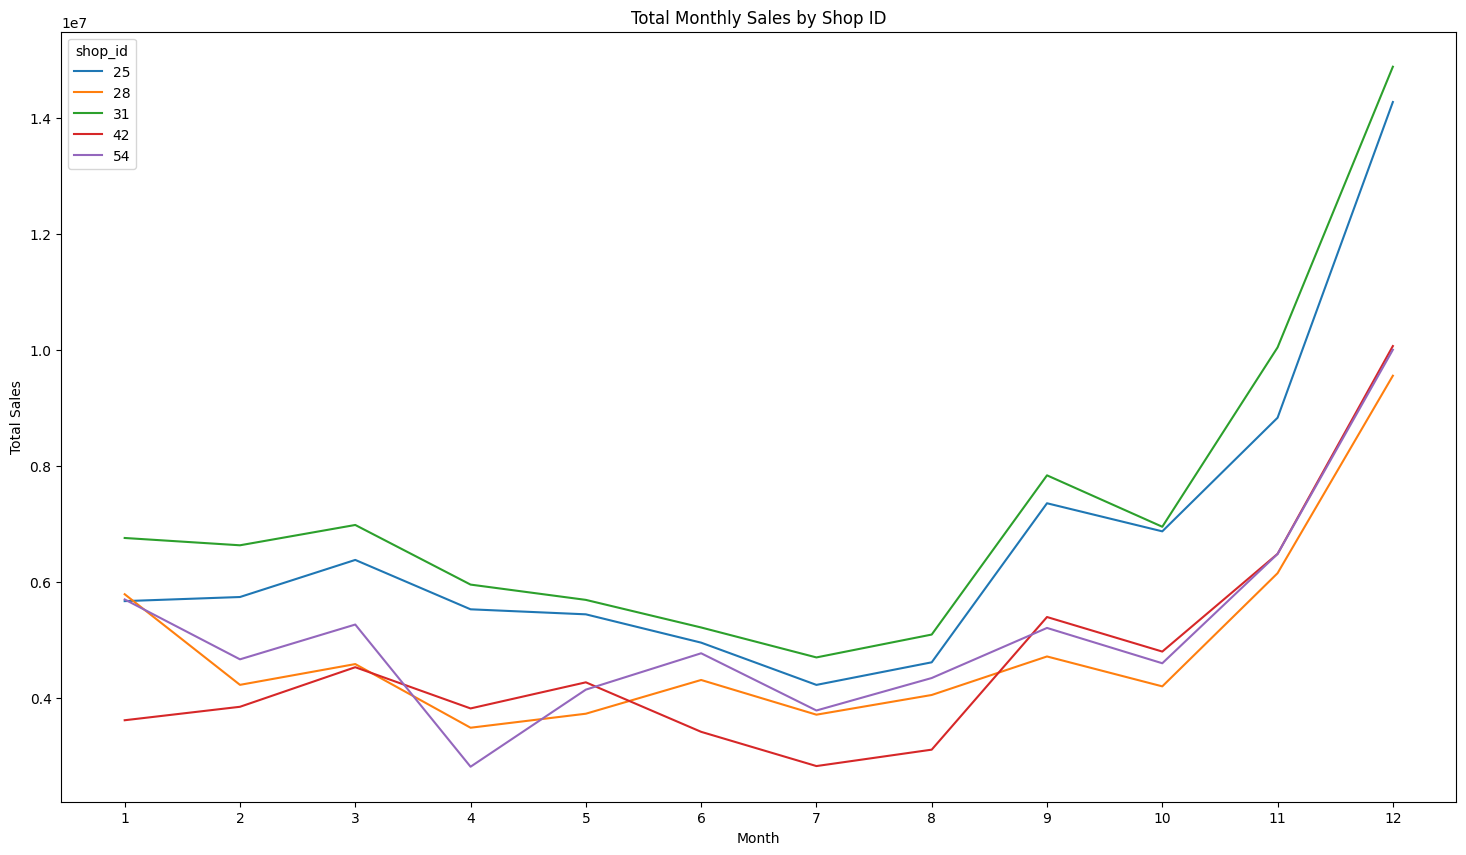

In [25]:
fig, ax = plt.subplots(figsize=(18,10))

sns.lineplot(data=item_count, x="month", y="total_sales", hue="shop_id", palette="tab10", errorbar=None, ax=ax)

plt.title("Total Monthly Sales by Shop ID")
ax.set_xlabel("Month")
ax.set_ylabel("Total Sales")

# Set x-ticks
ax.set_xticks(range(1, 13))
plt.show()

<p style="font-size:16px">
    📍 The most profitable months begin in September, with a drop in October, and the highest peak is reached in December. On average, the least profitable months are from April to August. Additionally, a small peak in sales is observed in March.
</p>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

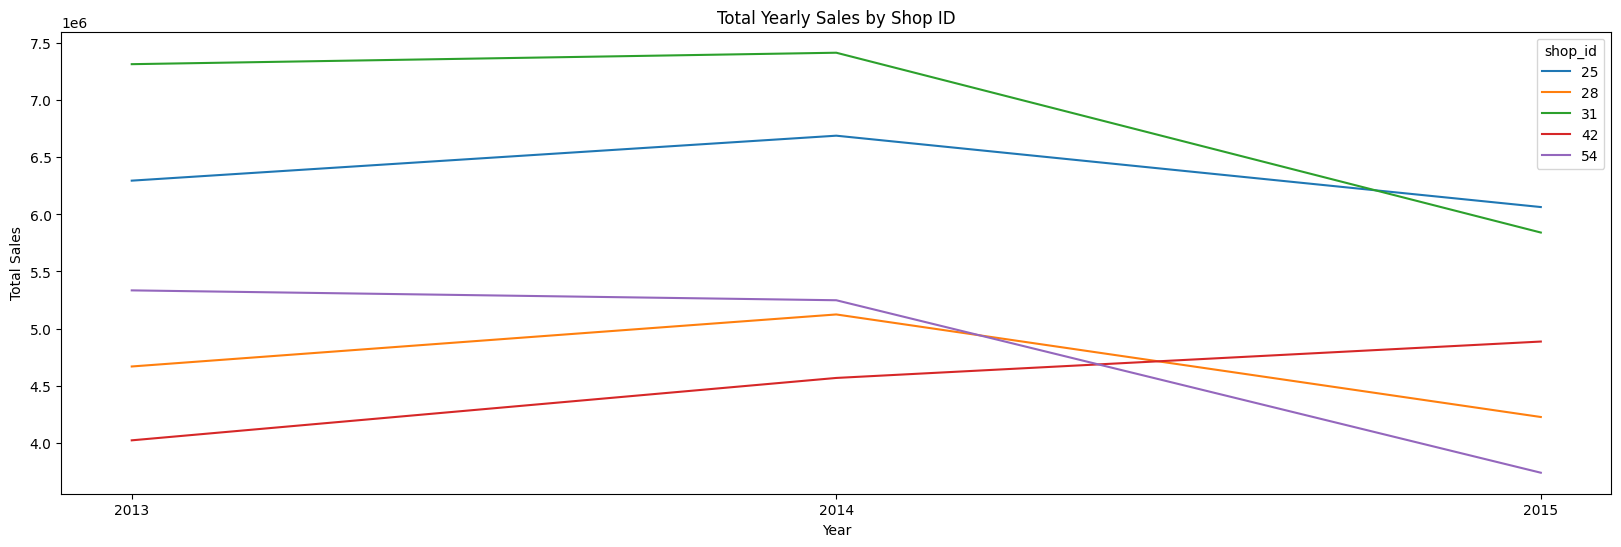

In [26]:
fig, ax = plt.subplots(figsize=(20,6))

item_count["month"] = item_count["month"].astype("int") 
sns.lineplot(data=item_count, x="year", y="total_sales", hue="shop_id", ax=ax, errorbar=None, palette="tab10")
plt.title("Total Yearly Sales by Shop ID")
ax.set_xlabel("Year")
ax.set_ylabel("Total Sales")
ax.set_xticks([2013, 2014, 2015])
plt.show()

<p style="font-size:16px"><b>
    ❓How many data points from 2015 are there?
   </b></p>

In [27]:
item_count.groupby("year")["month"].value_counts()

year  month
2013  1        5
      2        5
      3        5
      4        5
      5        5
      6        5
      7        5
      8        5
      9        5
      10       5
      11       5
      12       5
2014  1        5
      2        5
      3        5
      4        5
      5        5
      6        5
      7        5
      8        5
      9        5
      10       5
      11       5
      12       5
2015  1        5
      2        5
      3        5
      4        5
      5        4
      6        4
      7        4
      8        4
      9        4
      10       4
Name: count, dtype: int64

<p style="font-size:16px">
    📍 The yearly sales in 2013 and 2014 are similar, but in 2015, the data differs from previous years. This is because the 2015 data is missing for the months of November and December, and the number of data points from May to October is not the same.
</p>

<a id="3.5"></a>

## 📶 Analysis of the 5 Lowest-Performing Stores

<a id="3.5.1"></a>

### Top 5 Items

In [28]:
sales_sorted = sales.sort_values(["shop_id", "item_id"], ascending=[True, True])
# Group data by shop and item and sum item_price and item_cnt_day along all days
sum_sales = sales_sorted.groupby(["shop_id", "item_id"])[["item_price", "item_cnt_day"]].sum().reset_index()
# Compute the total sales by items
total_item_sales_by_store = total_sales(sum_sales)
total_item_sales_by_store = total_item_sales_by_store[total_item_sales_by_store["shop_id"].isin([36, 11, 8, 20, 1])]

In [29]:
group_by_store = total_item_sales_by_store.groupby(['shop_id', "item_id"]).agg({
    "total_sales": 'sum'
})
group_by_store = group_by_store.sort_values(["shop_id", "total_sales"], ascending=[True, False])
bottom_5_items = group_by_store.groupby("shop_id").head(5)
bottom_5_items.reset_index(drop=False, inplace=True)
bottom_5_items

,shop_id,item_id,total_sales
0,1,7938,1.408770e+06
1,1,4163,4.961280e+05
2,1,13490,3.419750e+05
3,1,6665,3.294900e+05
4,1,14447,2.857680e+05
5,8,2808,4.365630e+05
6,8,3432,2.647580e+05
7,8,6495,2.365522e+05
8,8,2445,2.249310e+05
9,8,1470,1.840150e+05


<p style="font-size:16px"><b>
    ❓How many of these items are repeated across the bottom 5 stores?
   </b></p>

In [30]:
items_repeated = bottom_5_items["item_id"].duplicated(keep=False).sum()
print(f"There are: {items_repeated} items repeated")
items_repeated = bottom_5_items[bottom_5_items["item_id"].duplicated(keep=False)]
items_repeated

There are: 0 items repeated


,shop_id,item_id,total_sales


<p style="font-size:16px"><b>
    ❓Are any of the top items found in the top 5 stores?
 </b></p>

In [31]:
bottom_5_items[bottom_5_items["item_id"].isin([6675, 3732, 5822, 17717, 5823, 16787, 3734])]

,shop_id,item_id,total_sales
10,11,6675,379406.68
14,11,5822,36386.72


<p style="font-size:16px"><b>
    ❓Are any of the bottom items found in the top 5 stores?
 </b></p>

In [32]:
bottom_5_items[bottom_5_items["item_id"].isin([2552, 3584, 5481, 10520, 14490, 8775, 2340, 5471, 20139, 11856, 4591, 8773, 19819, 20142, 10486, 13474, 1675, 4015, 10156, 10314, 8585, 3100, 5518, 7216, 7285])]

,shop_id,item_id,total_sales


<p style="font-size:16px">
    📍 Only one store has two of the top-selling items, and none of the bottom-selling items are present.
</p>

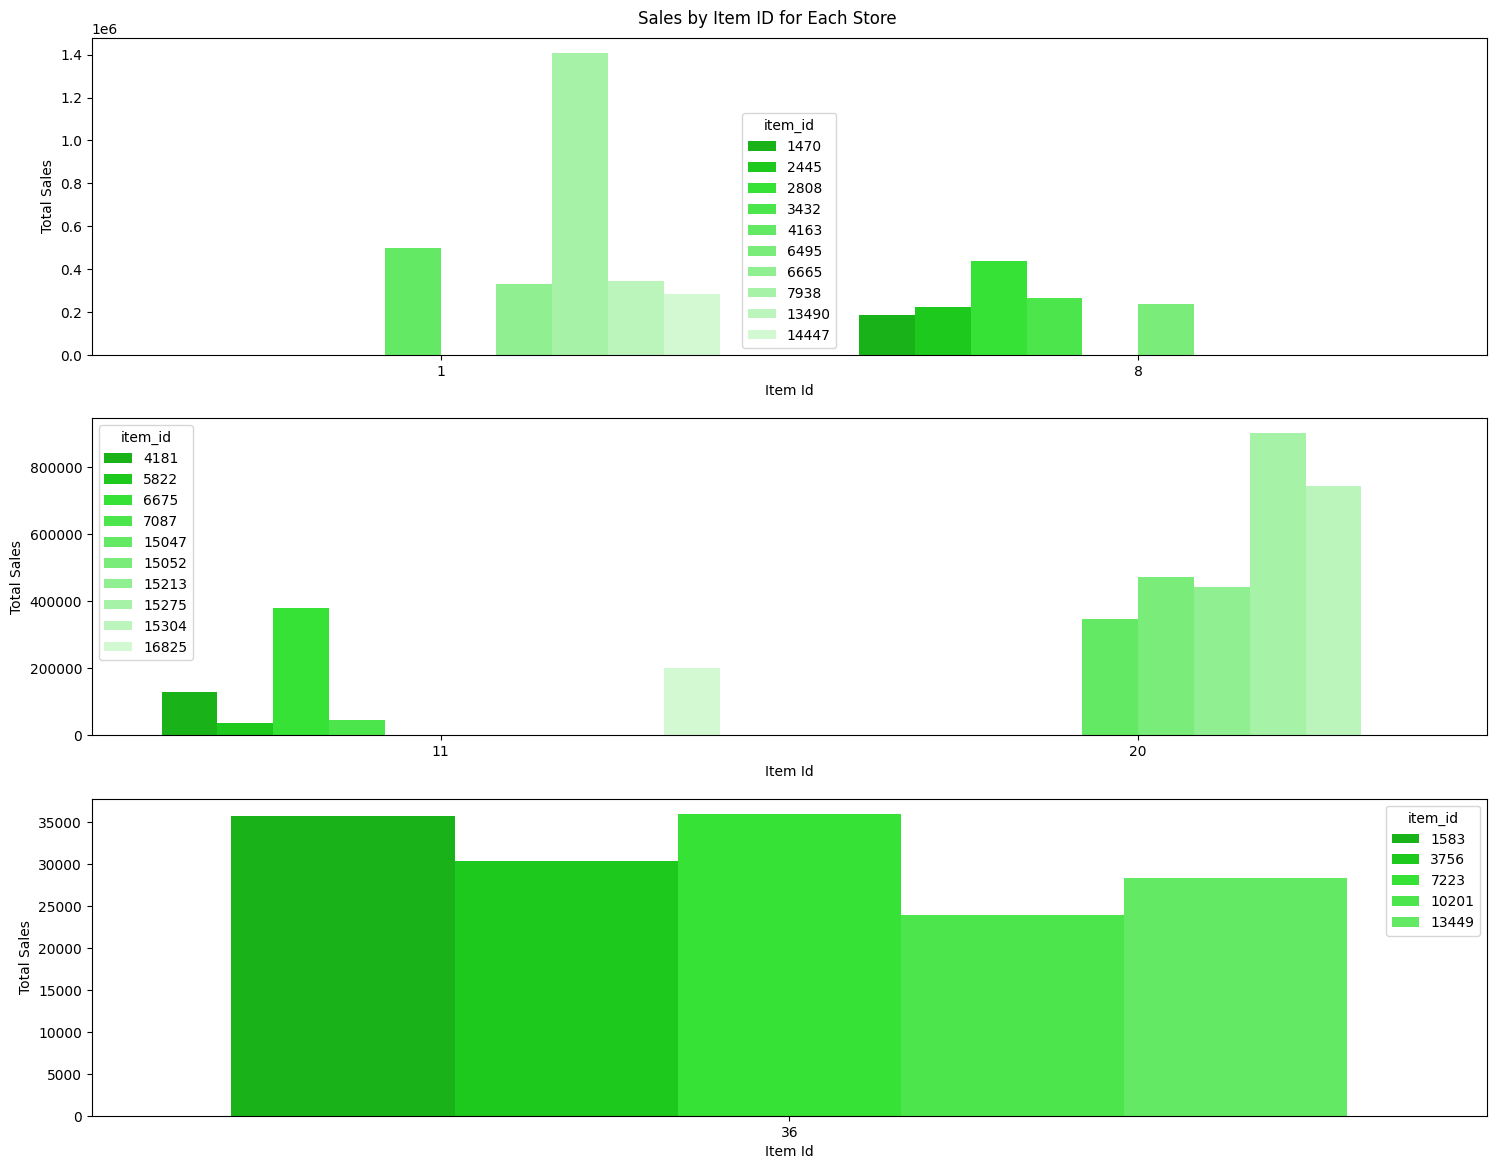

In [33]:
fig, axs = plt.subplots(3,1, figsize=(18,14))

sns.barplot(data=bottom_5_items[:10], x="shop_id", y="total_sales", hue="item_id", errorbar=None, palette=green_colors, ax=axs[0])
sns.barplot(data=bottom_5_items[10:20], x="shop_id", y="total_sales", hue="item_id", errorbar=None, palette=green_colors, ax=axs[1])
sns.barplot(data=bottom_5_items[20:30], x="shop_id", y="total_sales", hue="item_id", errorbar=None, palette=green_colors, ax=axs[2])

for ax in axs:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels())
    ax.set_ylabel("Total Sales")
    ax.set_xlabel("Item Id")

plt.suptitle("Sales by Item ID for Each Store", y=0.9)
plt.show()

<p style="font-size:16px">
    📍 There is no clear pattern among the top-selling items in the lowest 5 performing stores.
</p>

<a id="3.5.2"></a>

### Bottom 5 Items

In [34]:
group_by_store = total_item_sales_by_store.groupby(['shop_id', "item_id"]).agg({
    "total_sales": 'sum'
})
group_by_store = group_by_store.sort_values(["shop_id", "total_sales"], ascending=[True, True])
bottom_5_items = group_by_store.groupby("shop_id").head(5)
bottom_5_items.reset_index(drop=False, inplace=True)
bottom_5_items

,shop_id,item_id,total_sales
0,1,3190,27.0
1,1,8745,27.0
2,1,9081,27.0
3,1,9522,27.0
4,1,11183,27.0
5,8,3280,0.0
6,8,10825,0.0
7,8,11295,14.0
8,8,1064,28.0
9,8,3211,28.0


<p style="font-size:16px"><b>
    ❓How many of these items are repeated across the bottom 5 stores?
  </b></p>

In [35]:
items_repeated = bottom_5_items["item_id"].duplicated(keep=False).sum()
print(f"There are {items_repeated} of {len(bottom_5_items)} items that are repeated")
items_repeated = bottom_5_items[bottom_5_items["item_id"].duplicated(keep=False)]
items_repeated

There are 2 of 25 items that are repeated


,shop_id,item_id,total_sales
11,11,4806,36.0
24,36,4806,99.0


<p style="font-size:16px">
    📍 In conclusion, there is high diversity among both top 5 and bottom 5 items in each of the bottom 5 stores. While these items do not contribute significantly to profits, they also do not negatively impact total sales.
</p>

<a id="3.5.3"></a>

### Monthly Sales

In [36]:
sale_by_months = total_sales(sales)
# Filter interest field
sale_by_months = sale_by_months[["date", "shop_id", "item_id", "total_sales"]]
# Filter by the top 5 stores
sale_by_months_5_shops = sale_by_months[sale_by_months["shop_id"].isin([36, 11, 8, 20, 1])]
# Create a month column
sale_by_months_5_shops["month"] = sale_by_months_5_shops["date"].dt.month
# Create a year column
sale_by_months_5_shops["year"] = sale_by_months_5_shops["date"].dt.year 
sale_by_months_5_shops

/tmp/ipykernel_2246/492680161.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_by_months_5_shops["month"] = sale_by_months_5_shops["date"].dt.month
/tmp/ipykernel_2246/492680161.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_by_months_5_shops["year"] = sale_by_months_5_shops["date"].dt.year


,date,shop_id,item_id,total_sales,month,year
41348,2013-01-14,1,8070,137.0,1,2013
41349,2013-01-20,1,11415,70.0,1,2013
41350,2013-01-11,1,11435,110.0,1,2013
41351,2013-01-29,1,11441,75.0,1,2013
41352,2013-01-20,1,11450,249.0,1,2013
...,...,...,...,...,...,...
2912840,2015-10-01,20,20607,1098.9,10,2015
2912841,2015-10-02,20,20607,1099.0,10,2015
2912842,2015-10-04,20,20607,2198.0,10,2015
2912843,2015-10-03,20,20608,3998.0,10,2015


<p style="font-size:16px">Compute the Sum of Total Sales by Month</p>

In [37]:
item_count = sale_by_months_5_shops.groupby(["shop_id", "year", "month"]).agg({
    "total_sales": "sum"
}).reset_index(drop=False)
item_count

,shop_id,year,month,total_sales
0,1,2013,1,1527320.00
1,1,2013,2,1710887.00
2,8,2013,1,952881.00
3,8,2013,2,762880.00
4,8,2013,3,634196.00
5,8,2013,4,-599.00
6,11,2015,2,521655.14
7,20,2014,10,3498559.00
8,20,2015,10,3101365.00
9,36,2015,10,377714.00


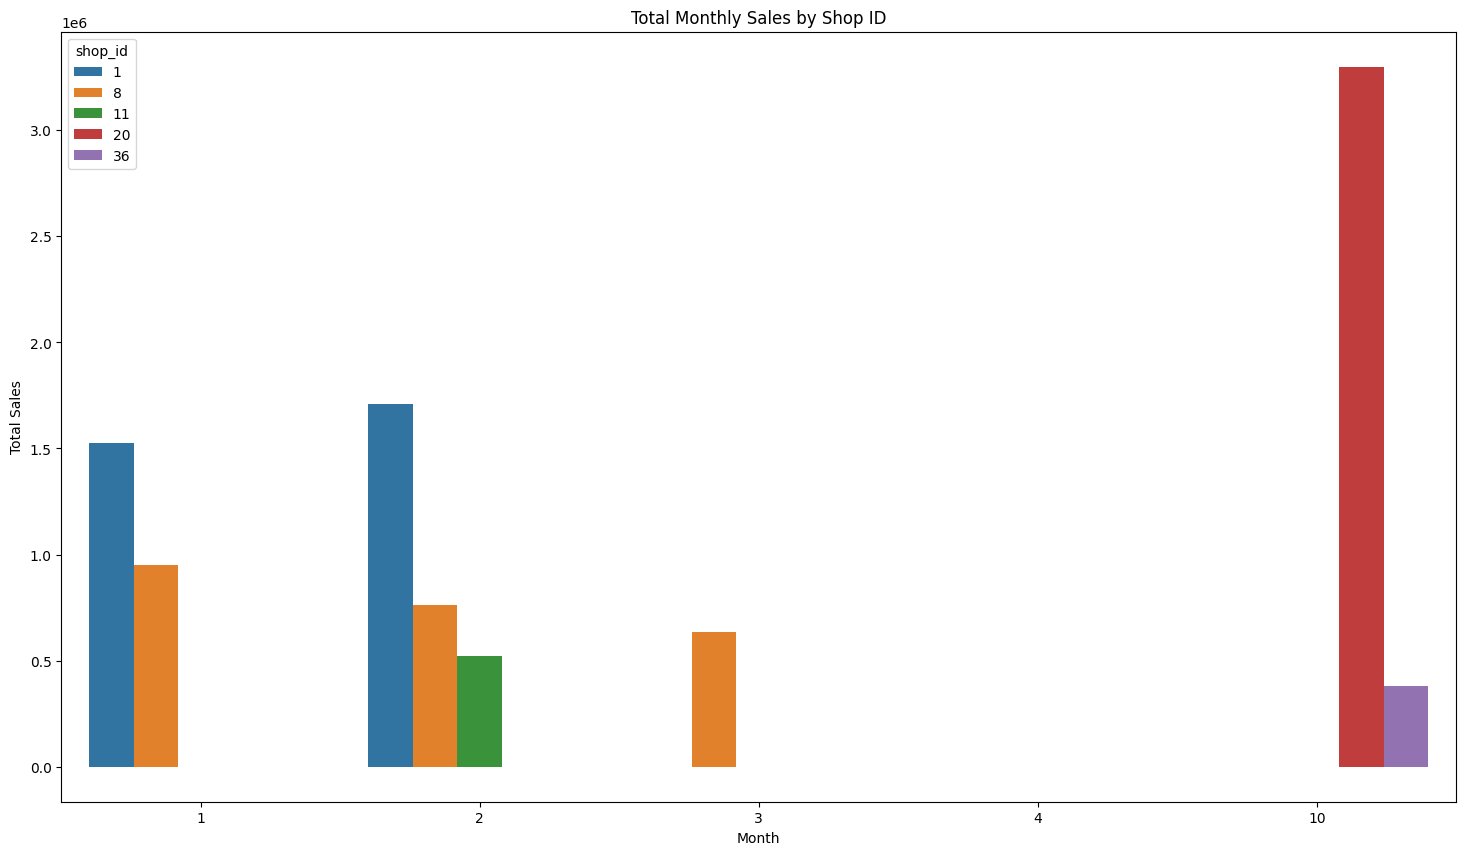

In [38]:
fig, ax = plt.subplots(figsize=(18,10))

sns.barplot(data=item_count, x="month", y="total_sales", hue="shop_id", palette="tab10", errorbar=None, ax=ax)

plt.title("Total Monthly Sales by Shop ID")
ax.set_xlabel("Month")
ax.set_ylabel("Total Sales")

plt.show()

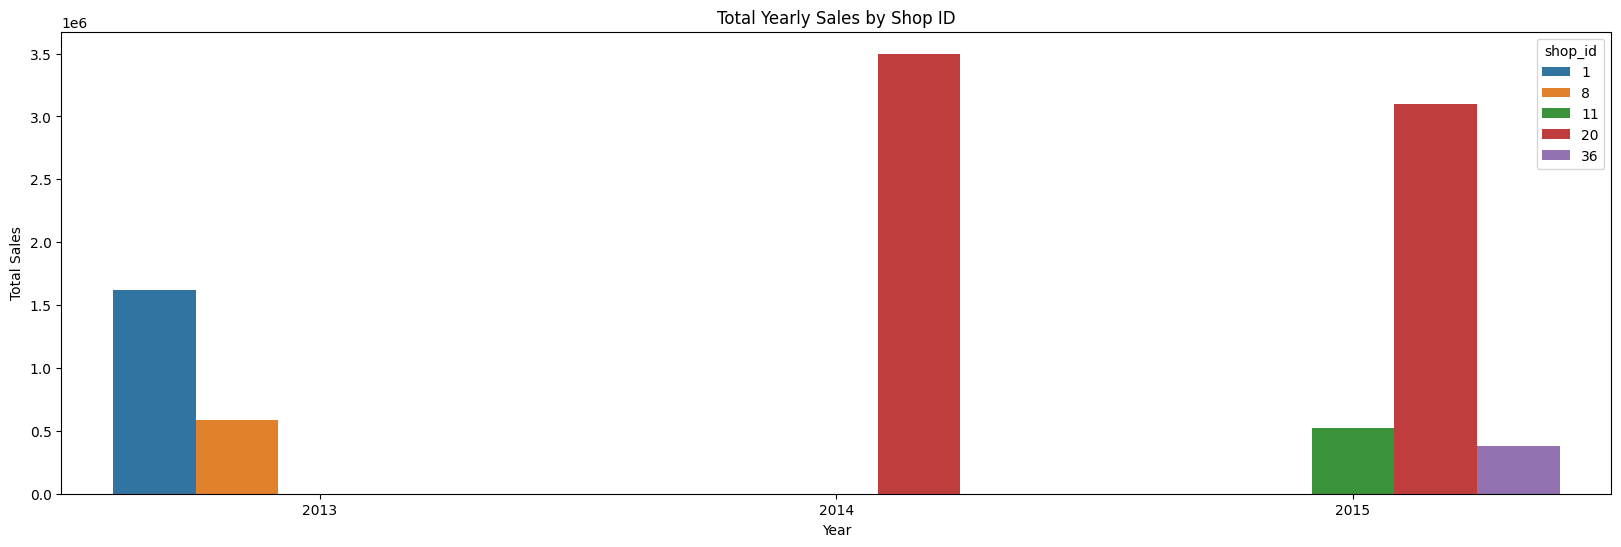

In [39]:
fig, ax = plt.subplots(figsize=(20,6))

item_count["month"] = item_count["month"].astype("int") 
sns.barplot(data=item_count, x="year", y="total_sales", hue="shop_id", ax=ax, errorbar=None, palette="tab10")
plt.title("Total Yearly Sales by Shop ID")
ax.set_xlabel("Year")
ax.set_ylabel("Total Sales")
plt.show()

<p style="font-size:16px">
    📍 There is not enough data to establish a time-related trend for the bottom 5 stores.
</p>

<a id="4"></a>

# 🎯 KPI 

<p style="font-size:18px">
    Here are some KPIs that might be useful to keep tracking the performance of the sales for each store:
</p>
<ol style="font-size:16px">
    <li><strong>Total Sales Revenue: </strong>
        <ul>
            <li>Formula: Sum of "total_sales" column for all items or stores.</li>
            <li>Purpose: Measures overall revenue performance.</li>
        </ul></li>

    
   <li><strong>Average Sales per Item:</strong>
        <ul>
            <li>Formula: The sum of the 'total_sales' column divided by the number of unique items sold.</li>
            <li>Purpose: Indicates average revenue generated by each item.</li>
        </ul></li>
    
   <li><strong>Sales Growth Rate:</strong>
        <ul>
            <li>Formula: (Sales this period - Sales previous period)/Sales previous period * 100.</li>
            <li>Purpose: Measures the growth in sales over time.</li>
        </ul></li>
    
   <li><strong>Item Contribution to Sales:</strong>
        <ul>
            <li>Formula: (Total sales of a specific item)/Total sales of all items * 100.</li>
            <li>Purpose: Shows the percentage of total sales contributed by each item.</li>
        </ul></li>
    
   <li><strong>Average Price per Item:</strong>
        <ul>
            <li>Formula: Sum of (Price of each item * Number of items sold)/Total number of items sold.</li>
            <li>Purpose: Indicates the average selling price of items.</li>
        </ul></li>
    
   <li><strong>Sales per Store:</strong> 
        <ul>
            <li>Formula: Sum of the "total_sales" column for each store.</li>
            <li>Purpose: Measures performance of each store in terms of total sales.</li>
        </ul>
         </li>
    
   <li><strong>Top-Selling Items:</strong> 
        <ul>
            <li>Formula: List of items with the highest total_sales.</li>
            <li>Purpose: Identifies which items are the most popular and contribute most to revenue.</li>
        </ul>
         </li>
    
   <li><strong>Bottom-Selling Items:</strong> 
        <ul>
            <li>Formula: List of items with the lowest total sales.</li>
            <li>Purpose: Identifies items that are underperforming.</li>
        </ul></li>
   
   <li><strong>Sales Efficiency:</strong>       
        <ul>
            <li>Formula: Total sales/Number of items sold.</li>
            <li>Purpose: Measures how effectively items are being sold.</li>
        </ul></li>
    
    
</ol>

<a id="4.1"></a>
## ⭐ Data-driven recommendations

<ol style="font-size:16px">
    <li><strong>Keep tracking the KPIs: </strong> This allows to measure each store's performance over time.</li>
    <li><strong>Identify Profitable Items for the April to August Range</strong> In this period, profits are "low" compared to the high peaks. Identifying potential items during this range can help increase the total sales for each store.</li>
    <li><strong>Identify Months of Profit and Loss for Each Item</strong> Stores can adjust inventory by decreasing stock for items with low movement during certain periods and increasing stock during other periods.</li>
    <li><strong>Identify Seasonal Items:</strong> Sales peaks occur in March, September, and December. These peaks may indicate seasonal periods for certain items.</li>
    <li><strong>Decrease in Return of Items</strong> In some cases, the number of items sold per day may be negative. This could indicate issues with the items, resulting in losses for the store. To address this, it may be beneficial to implement a better acquisition strategy for items to improve quality and reduce returns.</li>
    
</ol>